<a href="https://colab.research.google.com/github/snv1803/CatvsDog/blob/main/CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 17.4MB/s]
100% 1.06G/1.06G [00:08<00:00, 137MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential()
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [7]:
from tensorflow.keras.models import Sequential

# Check if there is a variable named 'Sequential'
if 'Sequential' in globals():
    # Print a warning message
    print("Warning: A variable named 'Sequential' is defined in the global scope.")
    print("This might conflict with the built-in 'Sequential' function from Keras.")

    # Rename the overwritten 'Sequential' variable
overwritten_sequential = Sequential

# Import the actual 'Sequential' class
from tensorflow.keras.models import Sequential

This might conflict with the built-in 'Sequential' function from Keras.


In [8]:
#overwritten_conv2d = Conv2D
from tensorflow.keras.layers import Conv2D

In [9]:
# Import the necessary layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten()) # Import the Flatten layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Add more layers...

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [11]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.1446 - accuracy: 0.5877 - val_loss: 0.6101 - val_accuracy: 0.6404
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.6166 - accuracy: 0.6428 - val_loss: 0.5737 - val_accuracy: 0.6788
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5606 - accuracy: 0.7020 - val_loss: 0.5587 - val_accuracy: 0.7498
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4858 - accuracy: 0.7444 - val_loss: 0.4741 - val_accuracy: 0.7732
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4342 - accuracy: 0.7746 - val_loss: 0.5640 - val_accuracy: 0.6488
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3860 - accuracy: 0.7994 - val_loss: 0.5235 - val_accuracy: 0.7218
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3360 - accuracy: 0.8288 - val_loss: 0.4697 - val_ac

Epoch 1/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2154 - accuracy: 0.8824 - val_loss: 0.5454 - val_accuracy: 0.8154
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1972 - accuracy: 0.8917 - val_loss: 0.6643 - val_accuracy: 0.7312
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1799 - accuracy: 0.8991 - val_loss: 0.4683 - val_accuracy: 0.8212
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1586 - accuracy: 0.9109 - val_loss: 0.5975 - val_accuracy: 0.8246
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1479 - accuracy: 0.9220 - val_loss: 0.5919 - val_accuracy: 0.8152
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1320 - accuracy: 0.9349 - val_loss: 1.2015 - val_accuracy: 0.8198
Epoch 7/10
625/625 [==============================] - 63s 99ms/step - loss: 0.1292 - accuracy: 0.9385 - val_loss: 0.6702 - val_acc

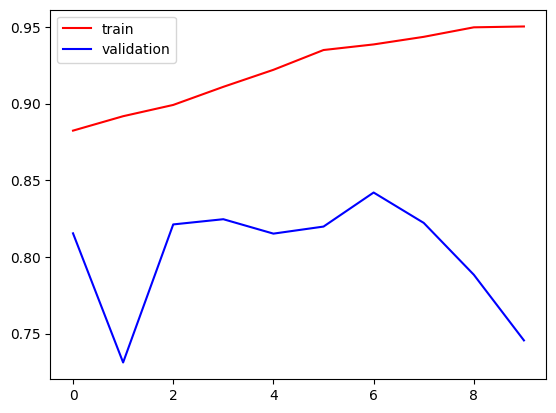

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

img = cv2.imread('/content/dog.jpg')

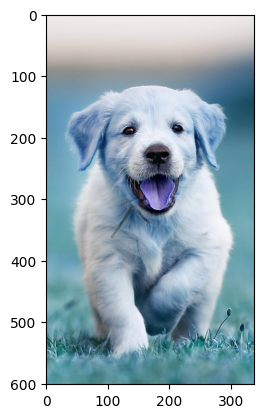

In [15]:
plt.imshow(img)

In [16]:
img.shape

(601, 338, 3)

In [17]:
img = cv2.resize(img, (256,256))

In [18]:
test_input = img.reshape ((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 386ms/step


array([[0.9799896]], dtype=float32)